<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DSCI-571-Lab-1" data-toc-modified-id="DSCI-571-Lab-1-1">DSCI 571 Lab 1</a></span><ul class="toc-item"><li><span><a href="#Instructions" data-toc-modified-id="Instructions-1.1">Instructions</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.2">Introduction</a></span></li><li><span><a href="#Getting-familiar-with-the-fit-and-predict-paradigm." data-toc-modified-id="Getting-familiar-with-the-fit-and-predict-paradigm.-1.3">Getting familiar with the <em>fit</em> and <em>predict</em> paradigm.</a></span></li><li><span><a href="#Fit-a-decision-tree-model-using-sklearn" data-toc-modified-id="Fit-a-decision-tree-model-using-sklearn-1.4">Fit a decision tree model using sklearn</a></span></li><li><span><a href="#Predict-using-the-model" data-toc-modified-id="Predict-using-the-model-1.5">Predict using the model</a></span></li><li><span><a href="#Visualize-the-trained-decision-tree-using-the-graphviz-package" data-toc-modified-id="Visualize-the-trained-decision-tree-using-the-graphviz-package-1.6">Visualize the trained decision tree using the <code>graphviz</code> package</a></span></li><li><span><a href="#Exercise-1:-Interpretation-of-the-decision-tree" data-toc-modified-id="Exercise-1:-Interpretation-of-the-decision-tree-1.7">Exercise 1: Interpretation of the decision tree</a></span><ul class="toc-item"><li><span><a href="#1(a)" data-toc-modified-id="1(a)-1.7.1">1(a)</a></span></li><li><span><a href="#1(b)" data-toc-modified-id="1(b)-1.7.2">1(b)</a></span></li><li><span><a href="#1(c)" data-toc-modified-id="1(c)-1.7.3">1(c)</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-1.8">Data</a></span></li><li><span><a href="#Exercise-2:-Exploratory-Data-Analysis" data-toc-modified-id="Exercise-2:-Exploratory-Data-Analysis-1.9">Exercise 2: Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#2(a)" data-toc-modified-id="2(a)-1.9.1">2(a)</a></span></li><li><span><a href="#2(b)" data-toc-modified-id="2(b)-1.9.2">2(b)</a></span></li><li><span><a href="#2(c)" data-toc-modified-id="2(c)-1.9.3">2(c)</a></span></li><li><span><a href="#2(d)" data-toc-modified-id="2(d)-1.9.4">2(d)</a></span></li></ul></li><li><span><a href="#Exercise-3:-Using-sklearn-to-build-a-decision-tree-classifier" data-toc-modified-id="Exercise-3:-Using-sklearn-to-build-a-decision-tree-classifier-1.10">Exercise 3: Using sklearn to build a decision tree classifier</a></span><ul class="toc-item"><li><span><a href="#3(a)" data-toc-modified-id="3(a)-1.10.1">3(a)</a></span></li><li><span><a href="#3(b)" data-toc-modified-id="3(b)-1.10.2">3(b)</a></span></li><li><span><a href="#3(c)" data-toc-modified-id="3(c)-1.10.3">3(c)</a></span></li></ul></li><li><span><a href="#Exercise-4:-Hyperparameters" data-toc-modified-id="Exercise-4:-Hyperparameters-1.11">Exercise 4: Hyperparameters</a></span><ul class="toc-item"><li><span><a href="#4(a)" data-toc-modified-id="4(a)-1.11.1">4(a)</a></span></li></ul></li><li><span><a href="#(Optional)-Exercise-5:-Decision-tree-implementation" data-toc-modified-id="(Optional)-Exercise-5:-Decision-tree-implementation-1.12">(Optional) Exercise 5: Decision tree implementation</a></span></li></ul></li></ul></div>

# DSCI 571 Lab 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction.text import CountVectorizer

## Instructions
rubric={mechanics:3}

Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/). 

## Introduction

Computer scientists write programs that encode a set of rules that are useful to solve problems. In many cases, it is very difficult to think of all these rules and specify them  manually. The idea of supervised machine learning is to build a system that learns these rules automatically given representative examples. In this lab, we will focus on the decision tree supervised learning algorithm. In particular, the goals of this lab are: 

- to understand decision tree algorithm 
- to learn how to train a decision tree using sklearn

## Getting familiar with the *fit* and *predict* paradigm. 

The idea of a machine learning algorithm is to *fit* the best model on the given training data (which is in the form of feature vactors and their targets) and then using this model to *predict* targets for new examples (represented with feature vectors.) Below we show an example of using these paradigms with a toy dataset.  

In [2]:
import pandas as pd

toy_data = {
            # Features
            'is_sweet':[0,0,1,1,0,1,0],
            'diameter':[3,3,1,1,3,1,4],
            # Target
            'target':['Apple','Apple','Grape','Grape','Lemon','Grape','Apple']
           }

df = pd.DataFrame(toy_data)
df

,is_sweet,diameter,target
0,0,3,Apple
1,0,3,Apple
2,1,1,Grape
3,1,1,Grape
4,0,3,Lemon
5,1,1,Grape
6,0,4,Apple


## Fit a decision tree model using sklearn 

In [3]:
from sklearn import tree 
model = tree.DecisionTreeClassifier()
# Prepare data for model fitting
feature_cols = ['is_sweet','diameter']
X = df.loc[:, feature_cols]
y = df.target

In [4]:
# Fit a model
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predict using the model

In [5]:
predictions = model.predict(X)
predictions

array(['Apple', 'Apple', 'Grape', 'Grape', 'Apple', 'Grape', 'Apple'],
      dtype=object)

Since we know the true fruit identities, we can compare the predictions to the true values.

In [6]:
pred_dict = toy_data.copy()
pred_dict['prediction'] = predictions
pd.DataFrame(pred_dict)

,is_sweet,diameter,target,prediction
0,0,3,Apple,Apple
1,0,3,Apple,Apple
2,1,1,Grape,Grape
3,1,1,Grape,Grape
4,0,3,Lemon,Apple
5,1,1,Grape,Grape
6,0,4,Apple,Apple


Notice that the model made an _error_ on example 4, which is a Lemon but was labelled as an Apple.

## Visualize the trained decision tree using the `graphviz` package

We will be using the graphviz package to visualize the trained decision tree model. You can refer to the first two pages of the [User Guide](https://graphviz.readthedocs.io/en/stable/manual.html) for general introduction of this package. 

Mac or unix users: You will have to install the package using

       pip install python-graphviz

and/or (possibly both) 

       conda install python-graphviz

Windows users: You might have to install both the [software](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) and the package. 

In [7]:
import graphviz 

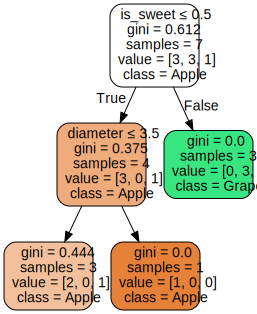

In [8]:
def save_and_show_decision_tree(model, 
                                class_names = ['Apple', 'Grape', 'Lemon'], 
                                save_file_prefix = 'test', **kwargs):
    """
    Saves the decision tree model as a pdf and a 
    """
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=feature_cols,  
                             class_names=class_names,  
                             filled=True, rounded=True,  
                             special_characters=True, **kwargs)  

    graph = graphviz.Source(dot_data) 
    graph.render(save_file_prefix) 
    return graph

graph = save_and_show_decision_tree(model)
graph

## Exercise 1: Interpretation of the decision tree

### 1(a)
rubric={reasoning:3}

Explain each split in this decision tree. How is the data partitioned after each split? 

On the first iteration, the decision tree calculates the gini or Entropy value for each field as a preidictor of the label/output with a certain threshold. The field/column with the lowest gini or entropy is selected along with a threshold and then used to predict the label.

In the first iteration of this tree, the field/column selected is the "is_sweet" column and the threshold is 0.5. Rows/records that have an is_sweet value of lesser than 0.5 are classified as Apples and all the others are classified into Not Apples. This split is what divides the table into two different tables.
The first split divides the original data into two tables. The first table is what the program predicts to be apples, while the second is Not Apples. The original table had 7 records and 2 fields. The predicted apple table has 4 records (4 apples and 1 Lemon) and the predicted NOT apple table has 3 grapes. 

In the second split, the algorithm takes the table to the left (i.e the tables it predicts as apples) and then tries to find the most predictive column/field amongst the columns again, just like before the first split (using gini or entropy and a threshold). In this iteration, it decides on the diameter column and a threshold of 3.5 as the strongest predictor of whether the record is an apple or not. Based of this threshold, the predicted apple table is split again into two tables, one of 2 apples 1 Lemon, and the other with 1 apple. Interesting to note, that the first split of this second step now has a gini of 0.444 compared to a gini of 0.375 in the previous step. I think this is because the lemon is still included in this split and in a way makes model bad, which is quantified as the increasse in the gini score. 

On the right side of the first split, is the table with all three grapes. This as expected would have a gini or entropy of zero because the table is all grapes and is 100% accurate. 

Each iteration of a decision tree picks a field/column and then calculates the error/accuracy of it's prediction as ratio of the number of correct predictions to the number of outputs. It does this by first deciding a threshold, and then sees if the threshold selected is a good metric of deciding wheter The field with the lowest error or highest accuracy is the field that is used to split the data set into two. All the the rows/records/objects that provided a correct prediction 

### 1(b) 
rubric={reasoning:2}

Why did the first split happen on the `is_sweet` feature and not on the `diameter` feature?

Before splitting the table, the algorithm has to decide which field/column to use for the prediction. The column selected should have the lowest gini or entropy score and threshold that makes the prediction accurate. This makes intuitive sense because a low entropy suggests that we can be more confident with our predictions/classification. It seems that in this case, the is_sweet feature is used because it probably had the lowest gini score/entropy at that threshold. 

### 1(c)
rubric={reasoning:2}

Discuss the predictions on the training data. Why is the fifth example (`is_sweet` = 0 and `diameter` = 3) classified as *Apple* even though in the training data its target is *Lemon*? 

The fifth example is classified as apple inspite of being a lemon because the diameter and sweetness of the record matches taht of apples as well. At this point SciKit makes a random decision between two and decided to choose appple. It could have very well chosen lemon, but in doing so it would be wrong about 

## Data

For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset.
The dataset contains a number of features of songs from 2017 and a binary target variable representing whether the user liked the song or not. See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). The question we will focus on is what kinds of songs the user likes.

Follow the steps below to get the data CSV. 

- If you do not have an account with Kaggle, you will first need to create one. 
- Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/downloads/spotifyclassification.zip/1) the data.  
- Read the [terms and conditions](https://www.kaggle.com/terms) before using the data. 


**Please do not include the data in your submission.**

 ## Exercise 2: Exploratory Data Analysis

### 2(a) 
rubric={correctness:1}

Open the data CSV as a pandas dataframe and view the first 10 rows of the dataframe. 

In [9]:
data = pd.read_csv("./data/data.csv")
data.head(10)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


### 2(b)
rubric={correctness:1}

Show some summary statistics of each feature using the `describe` method. 

In [10]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### 2(c) 
rubric={correctness:2}

Which features are continuous features and which ones are categorical? 

acousticness : Continious  
danceability : Continious  
duration_ms : Continious  
energy : Continious  
instrumentalness : Continious  
key : Categorical  
liveness : Continious  
loudness : Continious  
mode : Categorical  
speechiness : Continious  
tempo : Continious  
time_signature : Categorical  
valence : Continious  
target : Categorical  
song_title	: Categorical  
artist : Categorical  

### 2(d) 
rubric={correctness:2,reasoning:2}

Produce historgrams for the following features that show the distribution of the feature values, separated for positive and negative target values. Briefly note your observations; which features might be useful in differentiating the target classes?

- danceability
- tempo
- instrumentalness
- valence

Note: you can use matplotlib or seaborn, whichever you prefer.

Text(0.5,1,'danceability (target 0)')

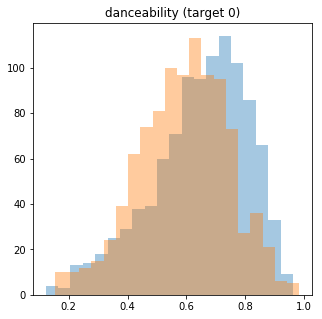

In [24]:
target1_data = data.query('target == 1')
target0_data = data.query('target == 0')
plt.rcParams['figure.figsize']=5,5
f, ax = plt.subplots(1, 1)
sns.distplot(target1_data[['danceability']], kde = False).set_title('danceability (target 1)')
sns.distplot(target0_data[['danceability']], kde = False).set_title('danceability (target 0)')

Text(0.5,1,'tempo (target 0)')

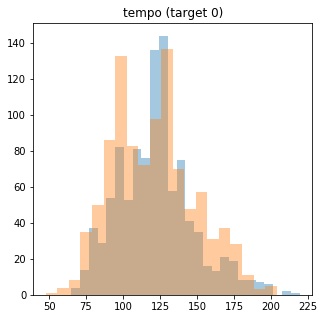

In [18]:
sns.distplot(target1_data[['tempo']], kde = False).set_title('tempo (target 1)')
sns.distplot(target0_data[['tempo']], kde = False).set_title('tempo (target 0)')

Text(0.5,1,'instrumentalness (target 0)')

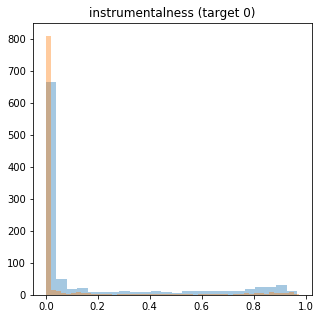

In [19]:
sns.distplot(target1_data[['instrumentalness']], kde = False).set_title('instrumentalness (target 1)')
sns.distplot(target0_data[['instrumentalness']], kde = False).set_title('instrumentalness (target 0)')

Text(0.5,1,'valence (target 0)')

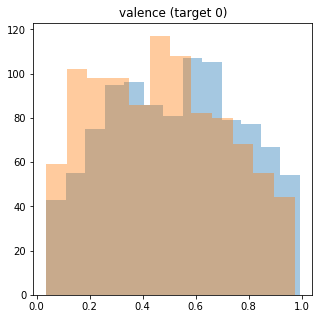

In [20]:
sns.distplot(target1_data[['valence']], kde = False).set_title('valence (target 1)')
sns.distplot(target0_data[['valence']], kde = False).set_title('valence (target 0)')

Instrumentalness seems to be the best indicator/predictor for distinguishing between the target classes. I think this is the case because the distribution of instrumentalness has a large concentration of the data located around the 0 mark, with very little elsewhere. Such a distribution has a lower entropy compared to the other features, which have a wider spread with more probability distributed across other values.

## Exercise 3: Using sklearn to build a decision tree classifier

### 3(a)
rubric={correctness:4}

Build a `DecisionTreeClassifier` using all features in the Spotify data. 

In [47]:
spotify_model = DecisionTreeClassifier()

# Let's prepare the data to fit it
X = data.drop(columns = ['Unnamed: 0','target', 'song_title', 'artist'])
y = pd.DataFrame(data['target'])

spotify_model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 3(b) 
rubric={code:2}

How accurate is your model on the training data? 
(Hint: Compare predictions with the values in the target column and find out how often they match.)

In [48]:
spotify_model.predict(X)

array([0, 1, 1, ..., 0, 0, 0])

In [49]:
spotify_model.score(X,y)

0.9985126425384234

The model seems to be 99.85% accurate on the training data

### 3(c)
rubric={correctness:2,reasoning:2}

Visualize the model tree and note your observations.

In [ ]:
acousticness : Continious  --
danceability : Continious  --
duration_ms : Continious  --
energy : Continious  --
instrumentalness : Continious  --
key : Categorical  --
liveness : Continious  --
loudness : Continious  --
mode : Categorical  --
speechiness : Continious  --
tempo : Continious  --
time_signature : Categorical  --
valence : Continious  --
target : Categorical  
song_title	: Categorical  
artist : Categorical  

In [34]:
feature_cols = ['energy','acousticness', 'danceability', 'duration_ms', 'instrumentalness',
                'key','liveness','loudness','mode','speechiness','tempo','time_signature',
                'valence']

In [68]:
def save_and_show_decision_tree2(model, 
                                class_names = ["1","0"], 
                                save_file_prefix = 'spotify', **kwargs):
    """
    Saves the decision tree model as a pdf and a 
    """
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=feature_cols,  
                             class_names=class_names,  
                             filled=True, rounded=True,  
                             special_characters=True, **kwargs)  

    graph = graphviz.Source(dot_data) 
    graph.render(save_file_prefix) 
    return graph

graph = save_and_show_decision_tree2(spotify_model)
# Please look at the PDF for the graph

The PDF name Spotify has the visual representation of the graph.

## Exercise 4: Hyperparameters

In this exercise, you'll experiment with different hyperparameters of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

### 4(a) 
rubric={correctness:2,reasoning:2}

Experiment with `min_samples_split` parameter. Try at least 10 different values of min_samples_split values in the range 2 to 200. Discuss how min_samples_split value affects the training accuracy. 

In [61]:
random_min_sample_splits = np.random.randint(low=2, high=200, size=20)
random_min_sample_splits.sort()
random_min_sample_splits

array([  2,   4,  22,  25,  28,  29,  31,  44,  50,  80,  90,  96, 126,
       127, 133, 146, 154, 168, 179, 180])

Let's run a loop over a list of random numbers between 2 and 200 and record the score of the model by allocating each random number as the value for the min_samples_split

In [64]:
scores = []
for val in random_min_sample_splits:
    spotify_model = DecisionTreeClassifier(min_samples_split = val)
    # Let's prepare the data to fit it
    X = data.drop(columns = ['Unnamed: 0','target', 'song_title', 'artist'])
    y = pd.DataFrame(data['target'])
    spotify_model.fit(X,y)
    spotify_model.predict(X)
    scores.append(spotify_model.score(X,y))
    
print(scores)

[0.9985126425384234, 0.9826474962816063, 0.8824987605354487, 0.8715914724838869, 0.8616757560733763, 0.866137828458106, 0.858701041150223, 0.8244918195339613, 0.8200297471492315, 0.8011898859692613, 0.7887952404561229, 0.7803668815071889, 0.7674764501735251, 0.7674764501735251, 0.7654933068914229, 0.7530986613782846, 0.7526028755577591, 0.7446703024293505, 0.7446703024293505, 0.7446703024293505]


Text(0,0.5,'Accuracy Scores')

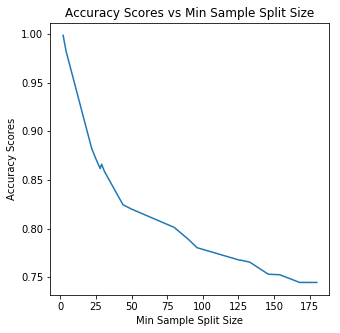

In [67]:
# Let's plot the values to see what's happening visually as well
plt.plot(random_min_sample_splits,scores)
plt.title("Accuracy Scores vs Min Sample Split Size")
plt.xlabel("Min Sample Split Size")
plt.ylabel("Accuracy Scores")

As expected the accuracy of model decreases substantially as the min sample split size increases. The min_sample_split parameter of the DecisionTreeClassifier function decides the minimum number of splits that an internal node (table/data if it's easier to understand) can be split into. By raising the number, we are asking the Decision Tree algorithm to only proceed if the minimum number of splits can be made OR samples/#of splits >= min_sample_split. When the samples/#of splits possible is less than the min_samples_split value, then the decision tree stops at that height. 

(From Slack by Mike)  
An important note however,( samples >= min_sample_split is a necessary condition to split but not a sufficient condition to split. For example, maybe there are no splits that improve the gini value. Or maybe there are no candidate splits at all (e.g. all 3 samples have the same features).


## (Optional) Exercise 5: Decision tree implementation
rubric={reasoning:1}

The file `decision_stump.py` contains code that implements a decision _stump_ in Python. Building of this code, implement a decision _tree_ and compare your tree to the one from scikit-learn in terms of both speed and output. 

Hint: your implementation should be recursive.

Note: the scikit-learn decision stump splits between feature values, whereas our code splits on feature values (as discussed in lecture).